<img src="http://ufldl.stanford.edu/tutorial/images/Autoencoder636.png">

* Unsupervised learning
* Input layer same as output layer
* Hidden layer units inds the imp features
* The features are such that output layer can be recreated
* Similar to PCA
* Middle layer can be seen as encoded variant of the inputs & output layer determines the quality of the encoded variant

<img src="https://www.safaribooksonline.com/library/view/python-deep-learning/9781787125193/assets/77ca0659-b206-40c3-b1cb-9cd49309c901.png">

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io

from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [9]:
mat = scipy.io.loadmat('data/train_32X32.mat')

In [10]:
mat = mat['X']
b, h, d, n = mat.shape

### Grayscale

In [16]:
img_gray = np.zeros(shape =(n, b * h))

In [17]:
def rgb2gray(rgb):    
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [18]:
for i in range(n):
    #Convert to greyscale
    img = rgb2gray(mat[:,:,:,i])
    img = img.reshape(1, 1024)
    img_gray[i,:] = img

In [19]:
# Normalize
X_train = img_gray/255.

In [25]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0].reshape(32,32), cmap='gray')

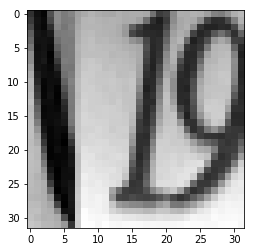

In [26]:
plt.show()

In [40]:
img_size = X_train.shape[1]

In [41]:
model = Sequential()
model.add(Dense(256, input_dim=img_size, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(img_size, activation='sigmoid'))

In [42]:
opt = Adam()
model.compile(loss='binary_crossentropy', optimizer=opt)

In [45]:

n_epochs = 5
batch_size = 512

In [46]:

model.fit(X_train, X_train, epochs=n_epochs, batch_size=batch_size, shuffle=True, validation_split=0.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/5
58605/58605 [==============================] - 40s 686us/step - loss: 0.6277 - val_loss: 0.6257
Epoch 2/5
58605/58605 [==============================] - 41s 695us/step - loss: 0.6260 - val_loss: 0.6247
Epoch 3/5
58605/58605 [==============================] - 44s 751us/step - loss: 0.6248 - val_loss: 0.6245
Epoch 4/5
58605/58605 [==============================] - 45s 764us/step - loss: 0.6245 - val_loss: 0.6239
Epoch 5/5
58605/58605 [==============================] - 43s 726us/step - loss: 0.6243 - val_loss: 0.6236


In [47]:
pred = model.predict(X_train)

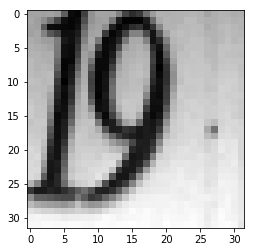

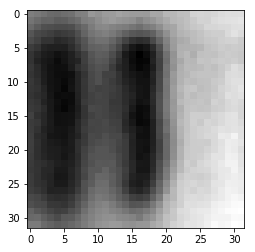

In [53]:

plt.imshow(img_gray[1].reshape(32, 32), cmap='gray')
plt.show()
plt.imshow(pred[1].reshape(32, 32), cmap='gray')
plt.show()

In [54]:
pred.shape

(73257, 1024)

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
__________